### Hive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
CREATE TABLE cite(citing INT, cited INT) // стандартный набор при создании таблиц
ROW FORMAT DELIMITED  
FIELDS TERMINATED BY ',' // разделяем поля данных по запятой
LINES TERMINATED BY '\n'  // разделяем данные (сторики таблицы) по знаку перехода на новую строку
STORED AS TEXTFILE; // считываем результат в виде текстового файла

In [ ]:
LOAD DATA LOCAL INPATH 'cite75_99.txt' # загружаем файл из (LOCAL) локальной файловой системы
OVERWRITE INTO TABLE cite; # записываем метадаты в таблицу cite.

#### Представил данные с номерам патентов и ссылками на них в hive

In [ ]:
CREATE TABLE cite(citing INT, cited INT)
ROW FORMAT DELIMITED  
FIELDS TERMINATED BY ','
LINES TERMINATED BY '\n'
STORED AS TEXTFILE;

In [ ]:
LOAD DATA INPATH '/user/askar/cite75_99.txt'
OVERWRITE INTO TABLE cite;

#### Выведим инфу по таблице

In [ ]:
hive> show tables;
OK
cite
employee
invites
pokes
Time taken: 0.048 seconds, Fetched: 4 row(s)

In [ ]:
hive> describe cite;
OK
citing              	int                 	                    
cited               	int                 	                    
Time taken: 0.057 seconds, Fetched: 2 row(s)

#### Выведем содержимое табл.

In [ ]:
hive> select * from cite limit 20;
OK
NULL	NULL
3858241	956203
3858241	1324234
3858241	3398406
3858241	3557384
3858241	3634889
3858242	1515701
3858242	3319261
3858242	3668705
3858242	3707004
3858243	2949611
3858243	3146465
3858243	3156927
3858243	3221341
3858243	3574238
3858243	3681785
3858243	3684611
3858244	14040
3858244	17445
3858244	2211676
Time taken: 0.129 seconds, Fetched: 20 row(s)

#### Выведем соличество объектов в таблице

In [ ]:
hive> select count(1) from cite;

WARNING: Hive-on-MR is deprecated in Hive 2 and may not be available in the future versions. Consider using a different execution engine (i.e. spark, tez) or using Hive 1.X releases.
Query ID = real7_20170605184015_008479e0-25f9-49d5-bf4b-d2fc56edfb07
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks determined at compile time: 1
In order to change the average load for a reducer (in bytes):
  set hive.exec.reducers.bytes.per.reducer=<number>
In order to limit the maximum number of reducers:
  set hive.exec.reducers.max=<number>
In order to set a constant number of reducers:
  set mapreduce.job.reduces=<number>
Job running in-process (local Hadoop)
2017-06-05 18:40:17,711 Stage-1 map = 0%,  reduce = 0%
2017-06-05 18:40:21,746 Stage-1 map = 100%,  reduce = 100%
Ended Job = job_local240828200_0001
MapReduce Jobs Launched: 
Stage-Stage-1:  HDFS Read: 528242214 HDFS Write: 0 SUCCESS
Total MapReduce CPU Time Spent: 0 msec
OK
16522439
Time taken: 6.585 seconds, Fetched: 1 row(s)

#### Создадим новую таблицу для того чтобы записать в него результаты выполнения запроса. 
Обычно результат запроса может быть таким же большим файлом как исходный по этому лучше сохранять его в новую таблицу, точнее в новый файл в hdfs.

In [ ]:
hive> create table cite_count(citi int, count int);
OK
Time taken: 0.058 seconds

In [ ]:
hive> insert overwrite table cite_count
    > select cited, count(citing) from cite group by cited;
    
WARNING: Hive-on-MR is deprecated in Hive 2 and may not be available in the future versions. Consider using a different execution engine (i.e. spark, tez) or using Hive 1.X releases.
Query ID = real7_20170605184850_566afb0a-07bd-4122-ac69-fcd6e7055311
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks not specified. Estimated from input data size: 2
In order to change the average load for a reducer (in bytes):
  set hive.exec.reducers.bytes.per.reducer=<number>
In order to limit the maximum number of reducers:
  set hive.exec.reducers.max=<number>
In order to set a constant number of reducers:
  set mapreduce.job.reduces=<number>
Job running in-process (local Hadoop)
2017-06-05 18:48:51,990 Stage-1 map = 0%,  reduce = 0%
2017-06-05 18:49:09,064 Stage-1 map = 34%,  reduce = 0%
2017-06-05 18:49:33,156 Stage-1 map = 67%,  reduce = 0%
2017-06-05 18:49:39,184 Stage-1 map = 81%,  reduce = 0%
2017-06-05 18:49:44,209 Stage-1 map = 100%,  reduce = 0%
2017-06-05 18:49:50,231 Stage-1 map = 100%,  reduce = 50%
2017-06-05 18:49:55,251 Stage-1 map = 100%,  reduce = 100%
Ended Job = job_local1848055762_0002
Loading data to table default.cite_count
MapReduce Jobs Launched: 
Stage-Stage-1:  HDFS Read: 1584601902 HDFS Write: 49286388 SUCCESS
Total MapReduce CPU Time Spent: 0 msec
OK
Time taken: 65.375 seconds

In [ ]:
hive> select * from cite_count where count > 10 limit 10;
OK
15192	18
28722	11
32066	11
40242	14
55620	18
61780	19
79436	11
86016	17
111128	12
112650	12
Time taken: 0.113 seconds, Fetched: 10 row(s)

#### Удалим результирующую таблицу, файлы из hdfs

In [ ]:
hive> drop table cite_count;
OK
Time taken: 1.172 seconds

#### Объединение таблиц

In [ ]:
create table customers(c_id int, name string, phone string )
row format delimited
fields terminated by ','
lines terminated by '\n'
stored as textfile;

In [ ]:
load data inpath '/user/hive/warehouse/employee/customer.csv'
OVERWRITE INTO TABLE customers;

In [ ]:
create table orders(c_id int, name string, price double, date_t string)
row format delimited
fields terminated by ','
lines terminated by '\n'
stored as textfile;

In [ ]:
load data inpath '/user/askar/join/orders.csv'
overwrite into table orders;

#### join

In [ ]:
hive> select c.c_id, c.name, c.phone, o.name, o.price, o.date_t from customers c join orders o on c.c_id = o.c_id;

WARNING: Hive-on-MR is deprecated in Hive 2 and may not be available in the future versions. Consider using a different execution engine (i.e. spark, tez) or using Hive 1.X releases.
Query ID = real7_20170605191432_c0d2b6cb-93fa-4e97-9fe5-53d9650a5554
Total jobs = 1
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/Cellar/hive/2.1.1/libexec/lib/log4j-slf4j-impl-2.4.1.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/Cellar/hadoop/2.8.0/libexec/share/hadoop/common/lib/slf4j-log4j12-1.7.10.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
2017-06-05 19:14:39	Starting to launch local task to process map join;	maximum memory = 477626368
2017-06-05 19:14:40	Dump the side-table for tag: 1 with group count: 3 into file: file:/var/folders/fd/jsc_8yyd1n17_x6g_28jwcdw0000gn/T/real7/1b2b1733-9893-4b14-a10b-dd7fc75cc599/hive_2017-06-05_19-14-32_536_2898106803795814289-1/-local-10004/HashTable-Stage-3/MapJoin-mapfile11--.hashtable
2017-06-05 19:14:40	Uploaded 1 File to: file:/var/folders/fd/jsc_8yyd1n17_x6g_28jwcdw0000gn/T/real7/1b2b1733-9893-4b14-a10b-dd7fc75cc599/hive_2017-06-05_19-14-32_536_2898106803795814289-1/-local-10004/HashTable-Stage-3/MapJoin-mapfile11--.hashtable (410 bytes)
2017-06-05 19:14:40	End of local task; Time Taken: 1.113 sec.
Execution completed successfully
MapredLocal task succeeded
Launching Job 1 out of 1
Number of reduce tasks is set to 0 since there's no reduce operator
Job running in-process (local Hadoop)
2017-06-05 19:14:43,456 Stage-3 map = 100%,  reduce = 0%
Ended Job = job_local1419657251_0002
MapReduce Jobs Launched: 
Stage-Stage-3:  HDFS Read: 768 HDFS Write: 0 SUCCESS
Total MapReduce CPU Time Spent: 0 msec
OK
1	Habib Nurmagamedov	555-555-555	B	88.25	20-May-2009
2	Tony Ferguson	564-667-789	C	32.45	30-Nov-2008
3	Jose Aldo	456-543-222	A	12.95	02-Jun-2009
3	Jose Aldo	456-543-222	D	25.67	22-Jan-2010
Time taken: 10.926 seconds, Fetched: 4 row(s)

#### lift join

In [ ]:
hive> select c.c_id, c.name, c.phone, o.name, o.price, o.date_t from customers c left join orders o on c.c_id = o.c_id;

WARNING: Hive-on-MR is deprecated in Hive 2 and may not be available in the future versions. Consider using a different execution engine (i.e. spark, tez) or using Hive 1.X releases.
Query ID = real7_20170605191636_eaa3f4e8-68d4-48da-a8b9-c4f1eaade880
Total jobs = 1
SLF4J: Class path contains multiple SLF4J bindings.
SLF4J: Found binding in [jar:file:/usr/local/Cellar/hive/2.1.1/libexec/lib/log4j-slf4j-impl-2.4.1.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: Found binding in [jar:file:/usr/local/Cellar/hadoop/2.8.0/libexec/share/hadoop/common/lib/slf4j-log4j12-1.7.10.jar!/org/slf4j/impl/StaticLoggerBinder.class]
SLF4J: See http://www.slf4j.org/codes.html#multiple_bindings for an explanation.
SLF4J: Actual binding is of type [org.apache.logging.slf4j.Log4jLoggerFactory]
2017-06-05 19:16:44	Starting to launch local task to process map join;	maximum memory = 477626368
2017-06-05 19:16:44	Dump the side-table for tag: 1 with group count: 3 into file: file:/var/folders/fd/jsc_8yyd1n17_x6g_28jwcdw0000gn/T/real7/1b2b1733-9893-4b14-a10b-dd7fc75cc599/hive_2017-06-05_19-16-36_947_3614742025118388585-1/-local-10004/HashTable-Stage-3/MapJoin-mapfile21--.hashtable
2017-06-05 19:16:44	Uploaded 1 File to: file:/var/folders/fd/jsc_8yyd1n17_x6g_28jwcdw0000gn/T/real7/1b2b1733-9893-4b14-a10b-dd7fc75cc599/hive_2017-06-05_19-16-36_947_3614742025118388585-1/-local-10004/HashTable-Stage-3/MapJoin-mapfile21--.hashtable (410 bytes)
2017-06-05 19:16:44	End of local task; Time Taken: 0.923 sec.
Execution completed successfully
MapredLocal task succeeded
Launching Job 1 out of 1
Number of reduce tasks is set to 0 since there's no reduce operator
Job running in-process (local Hadoop)
2017-06-05 19:16:47,841 Stage-3 map = 100%,  reduce = 0%
Ended Job = job_local1877425038_0003
MapReduce Jobs Launched: 
Stage-Stage-3:  HDFS Read: 884 HDFS Write: 0 SUCCESS
Total MapReduce CPU Time Spent: 0 msec
OK
1	Habib Nurmagamedov	555-555-555	B	88.25	20-May-2009
2	Tony Ferguson	564-667-789	C	32.45	30-Nov-2008
3	Jose Aldo	456-543-222	A	12.95	02-Jun-2009
3	Jose Aldo	456-543-222	D	25.67	22-Jan-2010
4	Konor Maccgregor	777-777-111	NULL	NULL	NULL

### Добавил новые данные 

In [ ]:
create table apat(PATENT bigint, GYEAR int, GDATE int, APPYEAR string, COUNTRY string,
                    POSTATE string, ASSIGNEE int, ASSCODE int, CLAIMS double, NCLASS int,
                    CAT string, SUBCAT string, CMADE string, CRECEIVE string, RATIOCIT string, 
                    GENERAL string, ORIGINAL string, FWDAPLAG string, BCKGTLAG string, 
                    SELFCTUB string, SELFCTLB string, SECDUPBD string, SECDLWB string)
row format delimited
fields terminated by ','
lines terminated by '\n'
stored as textfile;

In [ ]:
load data inpath '/user/askar/apat63_99.txt'
overwrite into table apat;

In [ ]:
hive>select GYEAR, sum(CLAIMS), avg(CLAIMS), count(CLAIMS) from apat where CLAIMS is not NULL group by GYEAR;

WARNING: Hive-on-MR is deprecated in Hive 2 and may not be available in the future versions. Consider using a different execution engine (i.e. spark, tez) or using Hive 1.X releases.
Query ID = real7_20170606115549_4fae7578-7e95-4205-b24e-c0b9a270f492
Total jobs = 1
Launching Job 1 out of 1
Number of reduce tasks not specified. Estimated from input data size: 1
In order to change the average load for a reducer (in bytes):
  set hive.exec.reducers.bytes.per.reducer=<number>
In order to limit the maximum number of reducers:
  set hive.exec.reducers.max=<number>
In order to set a constant number of reducers:
  set mapreduce.job.reduces=<number>
Job running in-process (local Hadoop)
2017-06-06 11:55:50,859 Stage-1 map = 0%,  reduce = 0%
2017-06-06 11:55:53,868 Stage-1 map = 100%,  reduce = 100%
Ended Job = job_local1790077692_0010
MapReduce Jobs Launched: 
Stage-Stage-1:  HDFS Read: 9002542026 HDFS Write: 0 SUCCESS
Total MapReduce CPU Time Spent: 0 msec
OK
1975	638042.0	8.962900529591076	71187
1976	660311.0	9.408015843615535	70186
1977	631083.0	9.678444904531862	65205
1978	676132.0	10.23140245747836	66084
1979	502582.0	10.29079814898235	48838
1980	639151.0	10.340241377078884	61812
1981	685498.0	10.423288629382963	65766
1982	603096.0	10.420485175202156	57876
1983	598883.0	10.533515082226717	56855
1984	712105.0	10.679759440895047	66678
1985	786421.0	10.974337147641641	71660
1986	791886.0	11.175675294250473	70858
1987	940817.0	11.371863366049412	82732
1988	910241.0	11.681287938092732	77923
1989	1157249.0	12.113097543360164	95537
1990	1110995.0	12.295616277654194	90357
1991	1215644.0	12.596433419337457	96507
1992	1247769.0	12.80616821470724	97435
1993	1268070.0	12.895146282680985	98337
1994	1348335.0	13.261354918661604	101674
1995	1382419.0	13.630903784338086	101418
1996	1547634.0	14.115467753851206	109641
1997	1645361.0	14.693347026254688	111980
1998	2273284.0	15.411154573619237	147509

In [ ]:
create table apat_stat (year int, sum double, mean double, count int)
row format delimited
fields terminated by '\t'
lines terminated by '\n'
stored as textfile;

In [ ]:
insert overwrite table apat_stat 
select GYEAR, sum(CLAIMS), avg(CLAIMS), count(CLAIMS) from apat where CLAIMS is not NULL group by GYEAR;

In [103]:
import findspark
findspark.init()
import pyspark
sc = pyspark.SparkContext(appName="Hadoop Hive")
hdfs = "hdfs://localhost:9000/"

In [104]:
out_data = sc.textFile(hdfs + '/user/hive/warehouse/apat_stat/000000_0')

In [105]:
out_data = out_data.flatMap(lambda x: [[float(v) if '.' in v else int(v) for v in x.split('\t')]])

In [106]:
v1 = out_data.take(1)[0][1]

In [110]:
out_data = out_data.flatMap(lambda x: [x + [round((x[1] - v1) / v1 * 100, 3)]])

In [111]:
x = np.array(out_data.collect())

In [ ]:
pd.DataFrame()

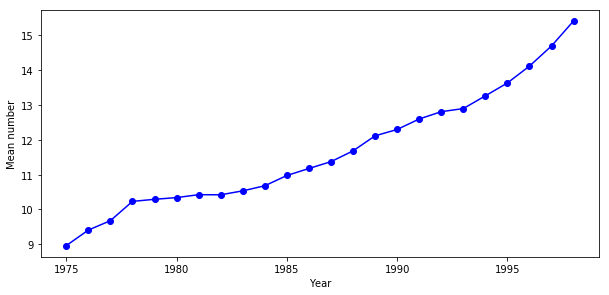

In [113]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(x.T[0], x.T[2], 'bo', x.T[0], x.T[2], 'k',  color='b')
plt.xlabel('Year')
plt.ylabel('Mean number')
plt.show()

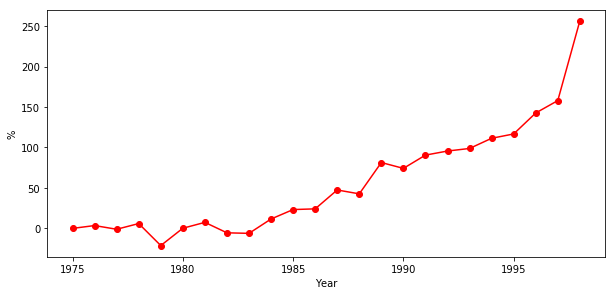

In [114]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(x.T[0], x.T[-1], 'bo', x.T[0], x.T[-1], 'k',  color='r')
plt.xlabel('Year')
plt.ylabel('%')
plt.show()

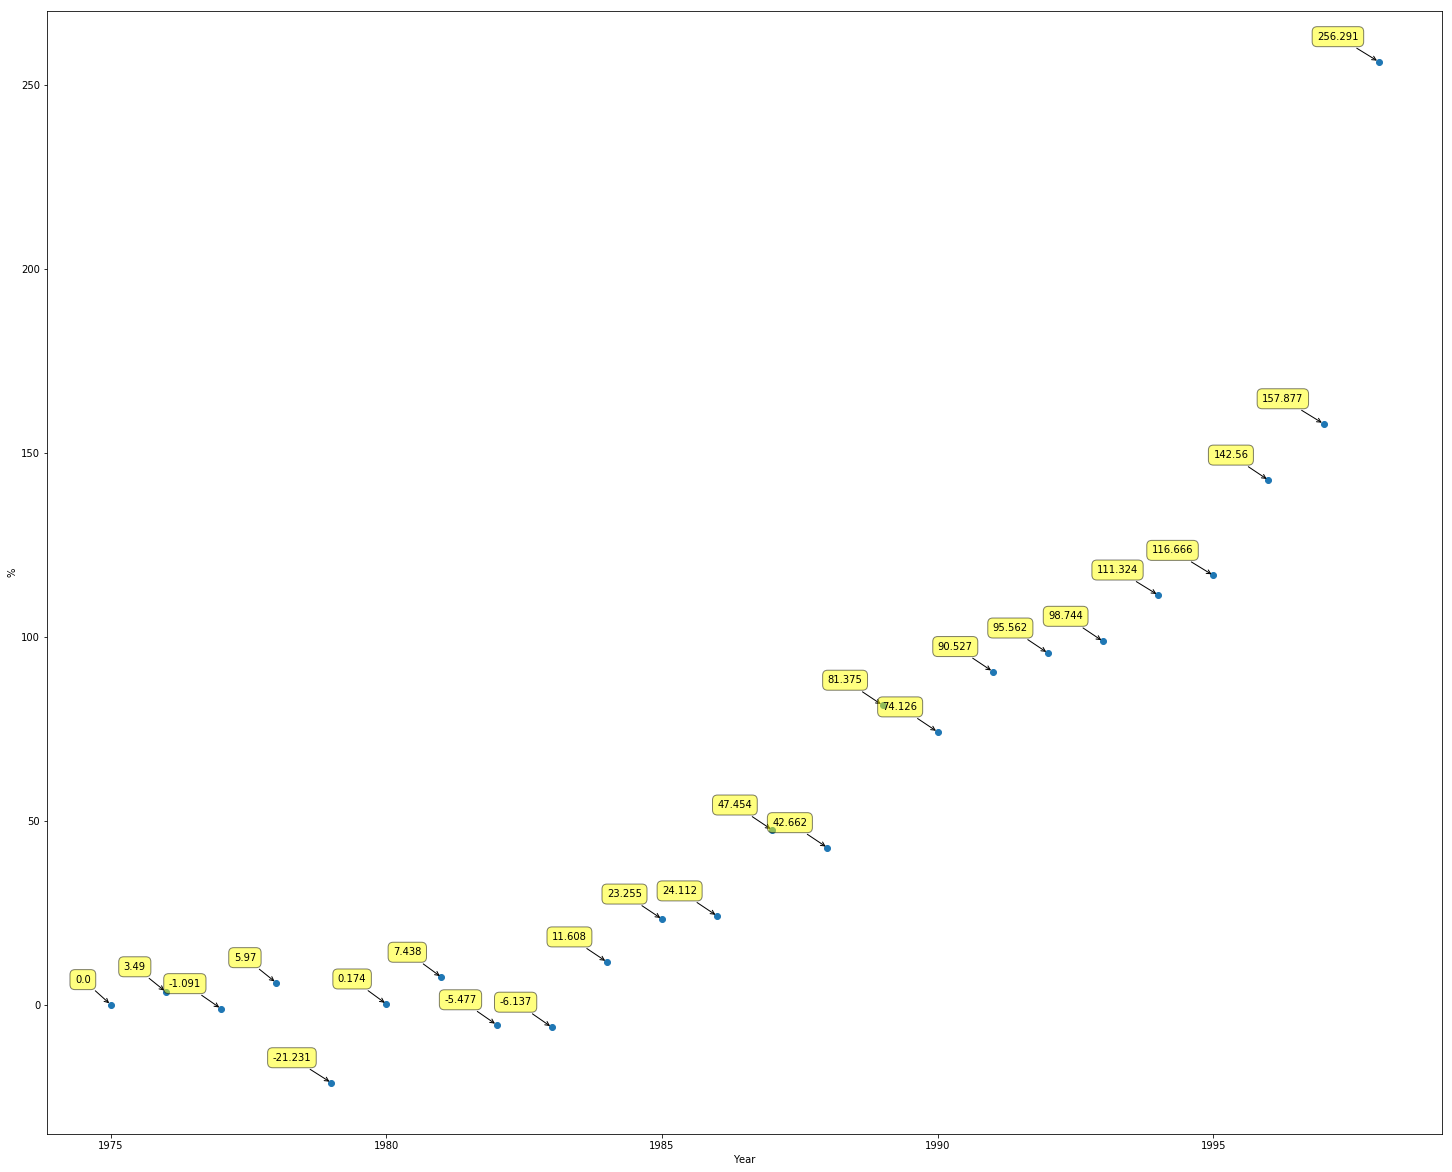

In [115]:
plt.figure(figsize=(25,20))
plt.subplots_adjust(bottom = 0.1)
plt.scatter(x.T[0], x.T[-1], marker='o', cmap=plt.get_cmap('Spectral'))
plt.xlabel('Year')
plt.ylabel('%')
for label, x_i, y_i in zip(x.T[-1], x.T[0], x.T[-1]):
    plt.annotate(
        label,
        xy=(x_i, y_i), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

In [129]:
year = pd.Series(x.T[0], index=range(x.T[0].size))
mean = pd.Series(x.T[2], index=range(x.T[2].size))
procent = pd.Series(x.T[-1], index=range(x.T[-1].size))

In [130]:
df = pd.DataFrame(dict(year=year, mean=mean, procent=procent)).reset_index()

In [131]:
df

,index,mean,procent,year
0,0,8.962901,0.000,1975.0
1,1,9.408016,3.490,1976.0
2,2,9.678445,-1.091,1977.0
3,3,10.231402,5.970,1978.0
4,4,10.290798,-21.231,1979.0
5,5,10.340241,0.174,1980.0
6,6,10.423289,7.438,1981.0
7,7,10.420485,-5.477,1982.0
8,8,10.533515,-6.137,1983.0
9,9,10.679759,11.608,1984.0


In [132]:
sc.stop()